# Heath–Jarrow–Morton framework

The **Heath–Jarrow–Morton (HJM) framework is a general framework to model the evolution of interest rate curves – instantaneous forward rate curves in particular** (as opposed to simple forward rates). When the volatility and drift of the instantaneous forward rate are assumed to be deterministic, this is known as the Gaussian Heath–Jarrow–Morton (HJM) model of forward rates. For direct modeling of simple forward rates the Brace–Gatarek–Musiela model represents an example.

The HJM framework originates from the work of David Heath, Robert A. Jarrow, and Andrew Morton in the late 1980s, especially Bond pricing and the term structure of interest rates

**The key to these techniques is the recognition that the drifts of the no-arbitrage evolution of certain variables can be expressed as functions of their volatilities and the correlations among themselves. In other words, no drift estimation is needed**

Models developed according to the HJM framework are different from the so-called short-rate models in the sense that **HJM-type models capture the full dynamics of the entire forward rate curve**, while the **short-rate models only capture the dynamics of a point on the curve (the short rate)**

However, models developed according to the general **HJM framework are often non-Markovian and can even have infinite dimensions**. A number of researchers have made great contributions to tackle this problem. They show that **if the volatility structure of the forward rates satisfy certain conditions, then an HJM model can be expressed entirely by a finite state Markovian system, making it computationally feasible**. Examples include a one-factor, two state model (O. Cheyette, "Term Structure Dynamics and Mortgage Valuation", Journal of Fixed Income, 1, 1992; P. Ritchken and L. Sankarasubramanian in "Volatility Structures of Forward Rates and the Dynamics of Term Structure", Mathematical Finance, 5, No. 1, Jan 1995), and later multi-factor versions.

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import copy as copylib
# from progressbar import *
%pylab
%matplotlib inline
import pandas as pd
pylab.rcParams['figure.figsize'] = (16, 4.5)
numpy.random.seed(0)

Using matplotlib backend: <object object at 0x7fb25b577270>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Load Historical Data

In [3]:
dataframe =  pd.read_csv('hjm_data.csv').set_index('time') / 100 # Convert interest rates to %
pd.options.display.max_rows = 10
display(dataframe)

,1/12,1/2,1,1.5,2,2.5,3,3.5,4,4.5,...,20.5,21,21.5,22,22.5,23,23.5,24,24.5,25
time,,,,,,,,,,,,,,,,,,,,,
1,0.057734,0.064382,0.067142,0.066512,0.064991,0.063255,0.061534,0.059925,0.058444,0.057058,...,0.034194,0.034772,0.035371,0.035985,0.036612,0.037252,0.037902,0.038562,0.039231,0.039908
2,0.057680,0.064506,0.067502,0.066842,0.065423,0.063852,0.062301,0.060846,0.059490,0.058198,...,0.033790,0.034437,0.035108,0.035798,0.036504,0.037224,0.037959,0.038705,0.039461,0.040227
3,0.057758,0.064410,0.067354,0.066845,0.065577,0.064109,0.062611,0.061164,0.059782,0.058438,...,0.032706,0.033294,0.033907,0.034539,0.035188,0.035853,0.036533,0.037224,0.037927,0.038639
4,0.057430,0.064103,0.066942,0.066215,0.064904,0.063462,0.062006,0.060601,0.059252,0.057933,...,0.031325,0.031891,0.032486,0.033106,0.033748,0.034409,0.035088,0.035784,0.036493,0.037214
5,0.057412,0.063978,0.066358,0.065502,0.064168,0.062722,0.061262,0.059849,0.058488,0.057157,...,0.030119,0.030667,0.031250,0.031862,0.032499,0.033161,0.033844,0.034546,0.035264,0.035997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,0.046421,0.045093,0.042471,0.042081,0.042663,0.043224,0.043640,0.043940,0.044156,0.044314,...,0.040260,0.040098,0.039950,0.039813,0.039687,0.039571,0.039464,0.039365,0.039273,0.039187
1261,0.046233,0.044976,0.042452,0.042131,0.042726,0.043285,0.043699,0.043998,0.044214,0.044374,...,0.040307,0.040147,0.039999,0.039863,0.039737,0.039621,0.039514,0.039414,0.039320,0.039233
1262,0.046348,0.045311,0.043295,0.043266,0.043963,0.044565,0.045003,0.045323,0.045560,0.045739,...,0.041276,0.041118,0.040972,0.040840,0.040718,0.040607,0.040505,0.040411,0.040324,0.040244


In [4]:
hist_timeline = list(dataframe.index)
tenors = [eval(x) for x in dataframe.columns]
hist_rates = matrix(dataframe)

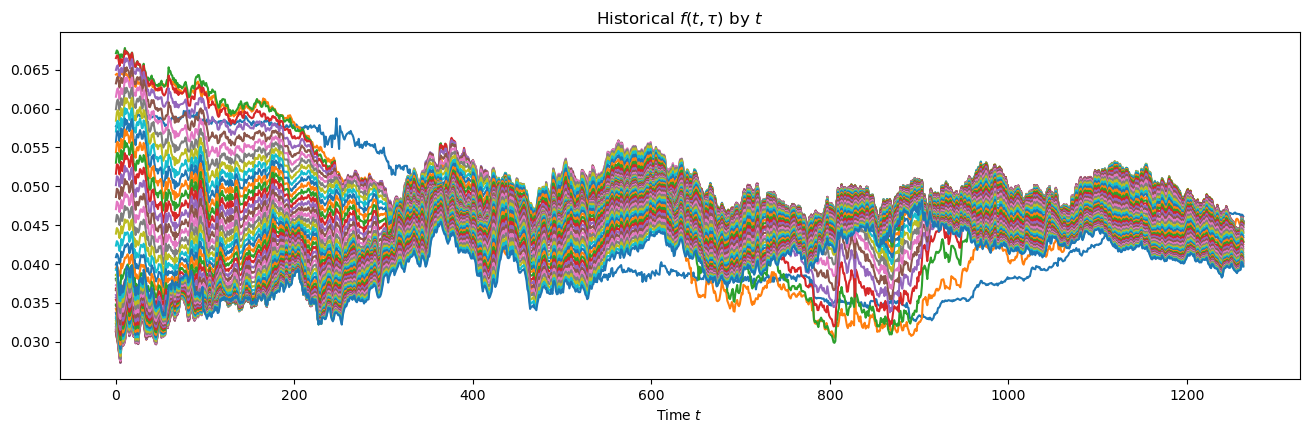

In [5]:
plot(hist_rates), xlabel(r'Time $t$'), title(r'Historical $f(t,\tau)$ by $t$'), show();


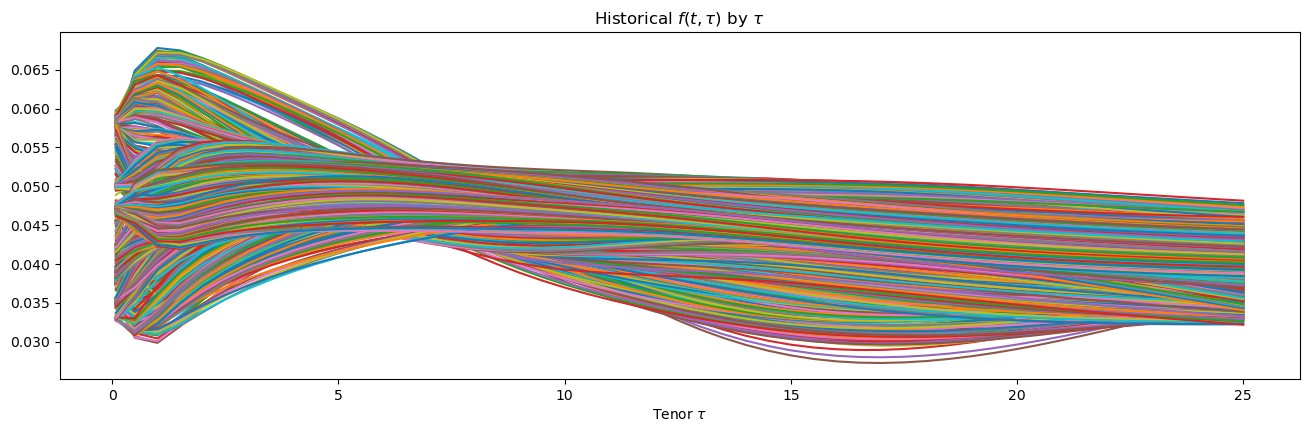

In [6]:
plot(tenors, hist_rates.transpose()), xlabel(r'Tenor $\tau$'), title(r'Historical $f(t,\tau)$ by $\tau$');


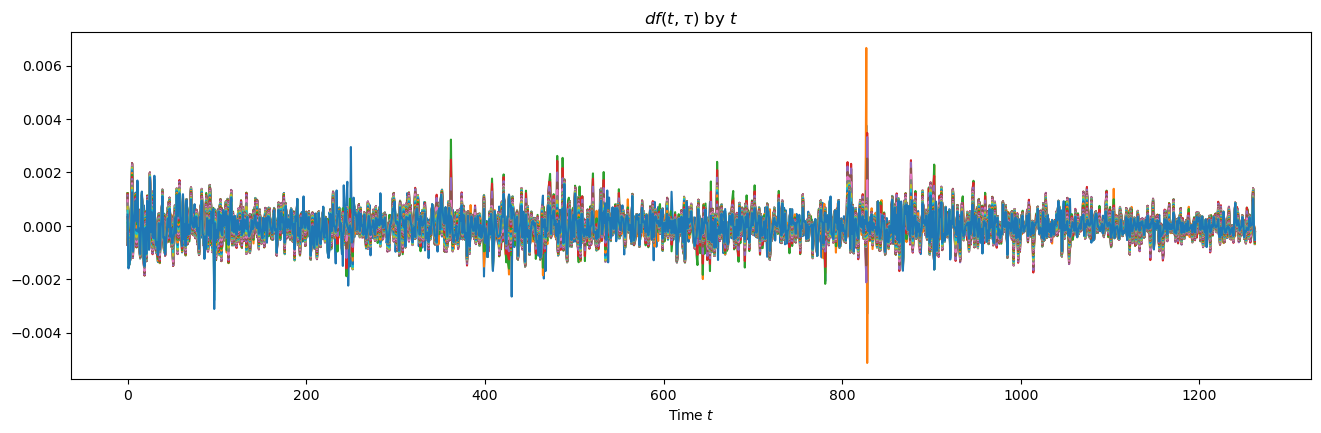

In [7]:
diff_rates = diff(hist_rates, axis=0)
assert(hist_rates.shape[1]==diff_rates.shape[1])
plot(diff_rates), xlabel(r'Time $t$'), title(r'$df(t,\tau)$ by $t$');

In [8]:
# Calculate covariance matrix
sigma = cov(diff_rates.transpose())
print("Sigma shape : " + str(sigma.shape))

Sigma shape : (51, 51)


In [9]:
sigma *= 252


In [10]:
eigval, eigvec = linalg.eig(sigma)
eigvec=matrix(eigvec)
assert type(eigval) == ndarray
assert type(eigvec) == matrix
print(eigval)

[2.02884026e-03 4.62889282e-04 1.63677691e-04 8.47948767e-05
 5.10134525e-05 3.26491422e-05 1.53862297e-05 3.90765854e-06
 1.45385608e-06 3.99451236e-07 7.74123147e-08 2.25094244e-08
 6.81015644e-09 2.04941493e-09 8.30654947e-10 3.18422245e-10
 1.69855176e-10 1.20686709e-10 8.18818675e-11 4.65678731e-11
 2.41691330e-11 1.26818337e-11 7.83625734e-12 4.07031447e-12
 2.61695756e-12 1.78999757e-12 1.07235516e-12 6.26514654e-13
 3.36669738e-13 2.89485611e-13 2.09893594e-13 2.02355360e-13
 1.20792318e-13 9.80002566e-14 7.30539298e-14 5.84913512e-14
 5.01860583e-14 4.50411897e-14 4.25136273e-14 3.00504048e-14
 1.99692132e-14 1.44931380e-14 8.67086879e-15 6.67527147e-15
 5.37125401e-15 4.23434979e-15 2.52345218e-15 1.26740795e-15
 4.35113690e-17 1.87368593e-16 2.51642111e-16]


Principal eigenvalues
[0.00202884 0.00046289 0.00016368]

Principal eigenvectors
[[ 0.00351033 -0.00972625 -0.00111508]
 [ 0.05665586 -0.16326718  0.27313784]
 [ 0.10114279 -0.2389149   0.40222423]
 [ 0.11563974 -0.24345609  0.35581018]
 [ 0.12154093 -0.23509872  0.27474251]
 [ 0.12568249 -0.22656368  0.19585028]
 [ 0.12948968 -0.21903235  0.12500321]
 [ 0.13320457 -0.21206961  0.0623539 ]
 [ 0.13681963 -0.2051638   0.00709335]
 [ 0.14026214 -0.19791715 -0.04135353]
 [ 0.14344533 -0.19001071 -0.08325192]
 [ 0.1462834  -0.18118042 -0.11865757]
 [ 0.14870205 -0.17120748 -0.14754572]
 [ 0.15064229 -0.15990426 -0.16990336]
 [ 0.15207044 -0.14712506 -0.18581986]
 [ 0.15298157 -0.13278428 -0.19552188]
 [ 0.15340022 -0.11686787 -0.19936452]
 [ 0.15337685 -0.09943599 -0.19785291]
 [ 0.15297871 -0.08062996 -0.19159875]
 [ 0.15228467 -0.06067689 -0.18129946]
 [ 0.15138052 -0.03988003 -0.16770213]
 [ 0.15035008 -0.01860959 -0.15155688]
 [ 0.1492673   0.00271527 -0.13358986]
 [ 0.14819153  0.02367

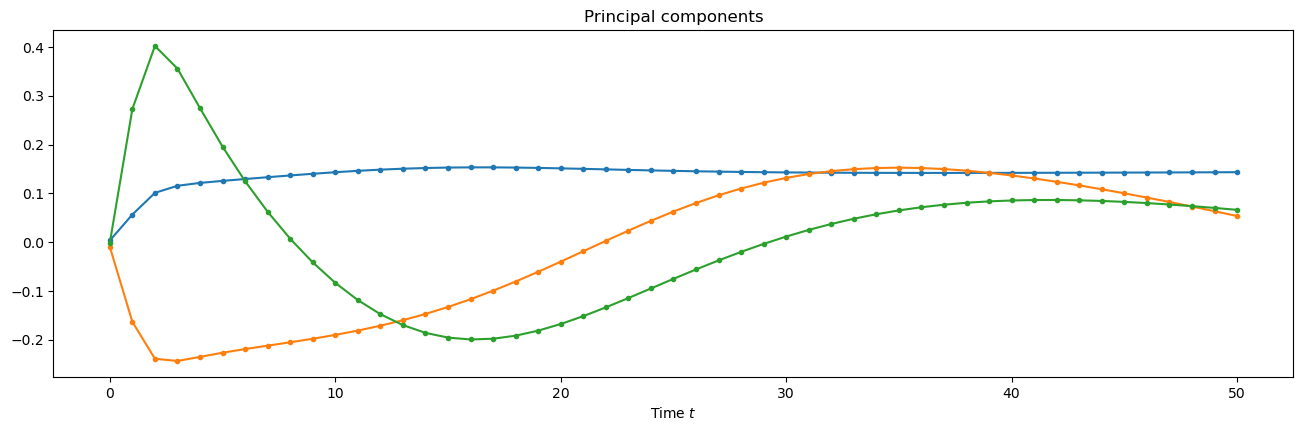

In [11]:
factors=3
index_eigvec = list(reversed(eigval.argsort()))[0:factors]   # highest principal component first in the array
princ_eigval = array([eigval[i] for i in index_eigvec])
princ_comp = hstack([eigvec[:,i] for i in index_eigvec])
print("Principal eigenvalues")
print(princ_eigval)
print()
print("Principal eigenvectors")
print(princ_comp)
plot(princ_comp, marker='.'), title('Principal components'), xlabel(r'Time $t$');

vols shape: (51, 3)


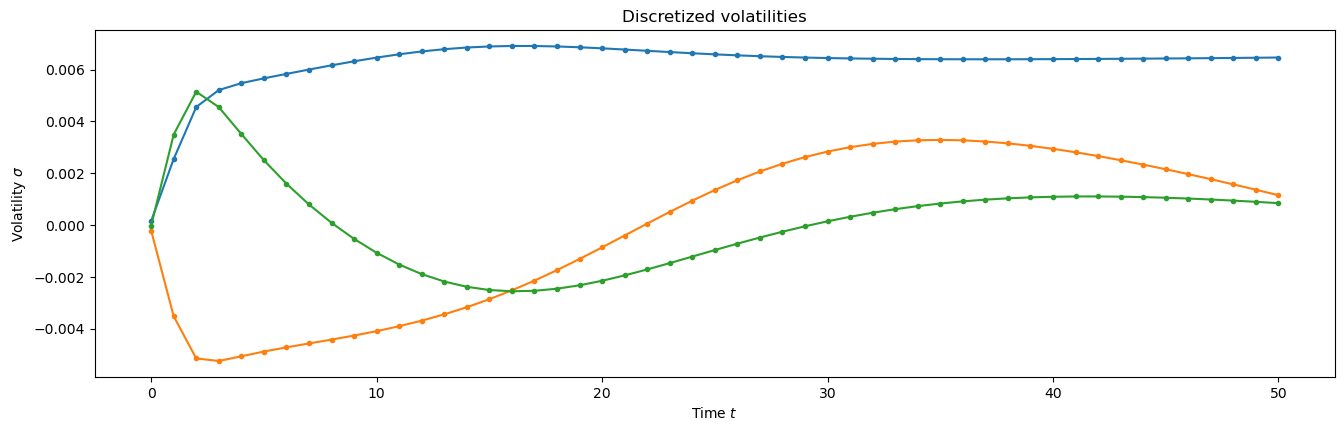

In [12]:
sqrt_eigval = matrix(princ_eigval ** .5)
tmp_m = vstack([sqrt_eigval for i in range(princ_comp.shape[0])])  # resize matrix (1,factors) to (n, factors)
vols = multiply(tmp_m, princ_comp) # multiply matrice element-wise
print('vols shape: ' + str(vols.shape))
plot(vols, marker='.'), xlabel(r'Time $t$'), ylabel(r'Volatility $\sigma$'), title('Discretized volatilities');

In [13]:
def get_matrix_column(mat, i):
    return array(mat[:,i].flatten())[0]

class PolynomialInterpolator:
    def __init__(self, params):
        assert type(params) == ndarray
        self.params = params
    def calc(self, x):
        n = len(self.params)
        C = self.params
        X = array([x**i for i in reversed(range(n))])
        return sum(multiply(X, C))

In [14]:
fitted_vols = []


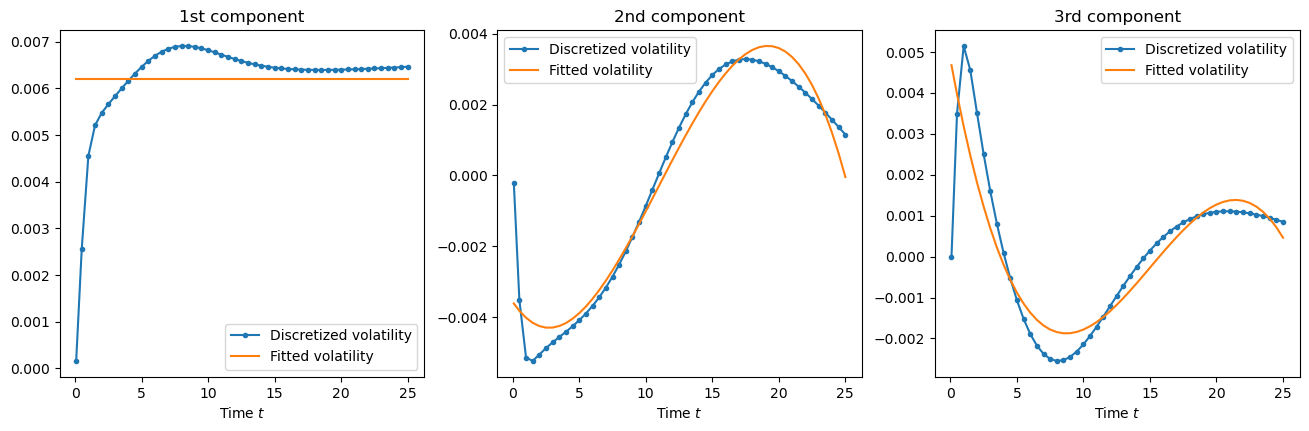

In [15]:
def fit_volatility(i, degree, title):
    vol = get_matrix_column(vols, i)
    fitted_vol = PolynomialInterpolator(polyfit(tenors, vol, degree))    
    plot(tenors, vol, marker='.', label='Discretized volatility')
    plot(tenors, [fitted_vol.calc(x) for x in tenors], label='Fitted volatility')
    plt.title(title), xlabel(r'Time $t$'), legend();
    fitted_vols.append(fitted_vol)
    
subplot(1, 3, 1), fit_volatility(0, 0, '1st component');
subplot(1, 3, 2), fit_volatility(1, 3, '2nd component');
subplot(1, 3, 3), fit_volatility(2, 3, '3rd component');

In [16]:
def integrate(f, x0, x1, dx):
    n = (x1-x0)/dx+1
    out = 0
    for i, x in enumerate(linspace(x0, x1, int(n))):
        if i==0 or i==n-1:
            out += 0.5 * f(x)
        else:
            out += f(x)  # not adjusted by *0.5 because of repeating terms x1...xn-1 - see trapezoidal rule
    out *= dx
    return out

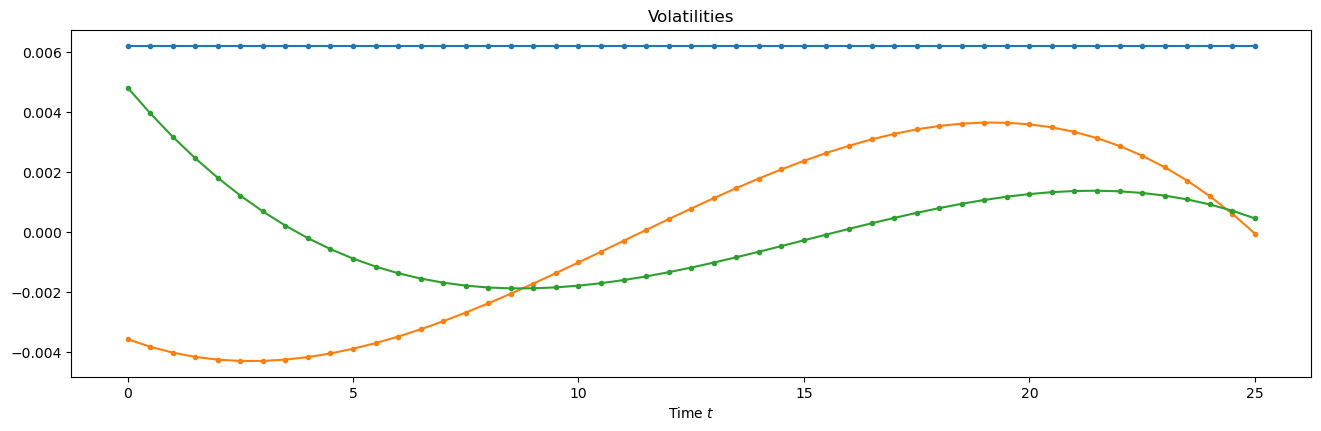

In [17]:
mc_tenors = linspace(0,25,51)
# Discretize fitted volfuncs for the purpose of monte carlo simulation
mc_vols = matrix([[fitted_vol.calc(tenor) for tenor in mc_tenors] for fitted_vol in fitted_vols]).transpose()
plot(mc_tenors, mc_vols, marker='.'), xlabel(r'Time $t$'), title('Volatilities');

In [18]:
def m(tau, fitted_vols):
    #This funciton carries out integration for all principal factors. 
    #It uses the fact that volatility is function of time in HJM model
    out = 0.
    for fitted_vol in fitted_vols:
        assert isinstance(fitted_vol, PolynomialInterpolator)
        out += integrate(fitted_vol.calc, 0, tau, 0.01) * fitted_vol.calc(tau)
    return out

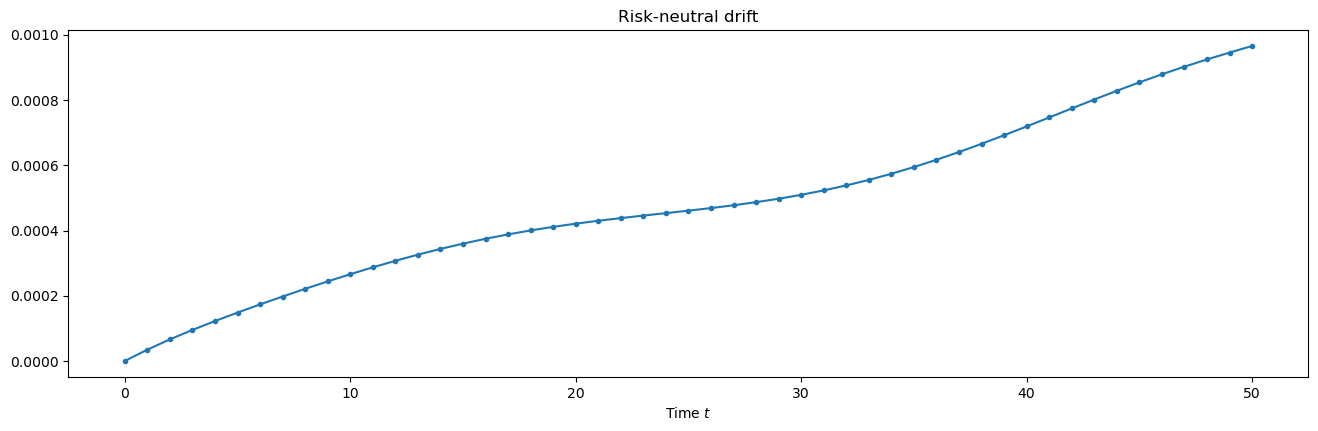

In [19]:
mc_drift = array([m(tau, fitted_vols) for tau in mc_tenors])
plot(mc_drift, marker='.'), xlabel(r'Time $t$'), title('Risk-neutral drift');

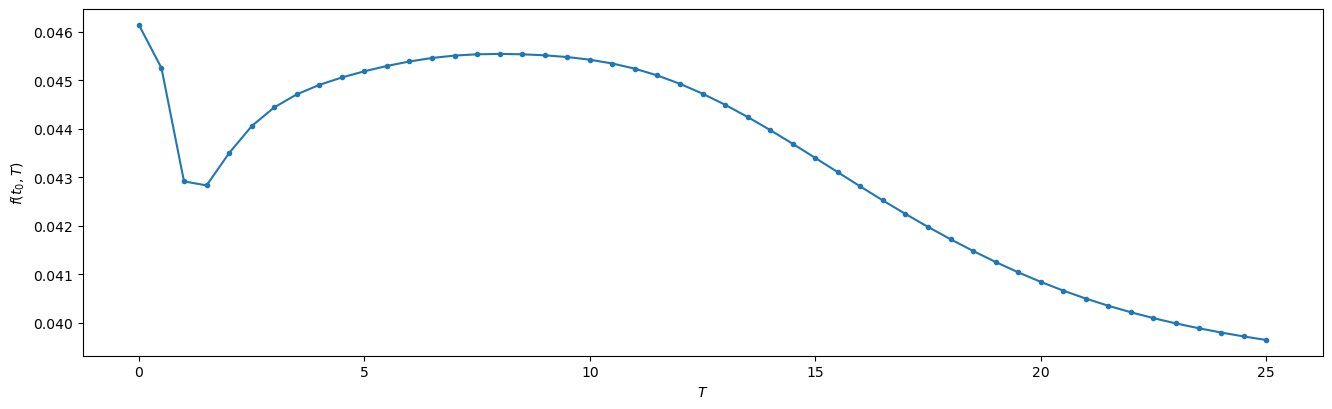

In [20]:
curve_spot = array(hist_rates[-1,:].flatten())[0]
plot(mc_tenors, curve_spot.transpose(), marker='.'), ylabel('$f(t_0,T)$'), xlabel("$T$");


In [21]:
def simulation(f, tenors, drift, vols, timeline):
    assert type(tenors)==ndarray
    assert type(f)==ndarray
    assert type(drift)==ndarray
    assert type(timeline)==ndarray
    assert len(f)==len(tenors)
    vols = array(vols.transpose())  # 3 rows, T columns
    len_tenors = len(tenors)
    len_vols = len(vols)
    yield timeline[0], copylib.copy(f)
    for it in range(1, len(timeline)):
        t = timeline[it]
        dt = t - timeline[it-1]
        sqrt_dt = sqrt(dt)
        fprev = f
        f = copylib.copy(f)
        random_numbers = [normal() for i in range(len_vols)]
        for iT in range(len_tenors):
            val = fprev[iT] + drift[iT] * dt
            #
            sum = 0
            for iVol, vol in enumerate(vols):
                sum += vol[iT] * random_numbers[iVol]
            val += sum * sqrt_dt
            #
            iT1 = iT+1 if iT<len_tenors-1 else iT-1   # if we can't take right difference, take left difference
            dfdT = (fprev[iT1] - fprev[iT]) / (iT1 - iT)
            val += dfdT * dt
            #
            f[iT] = val
        yield t,f

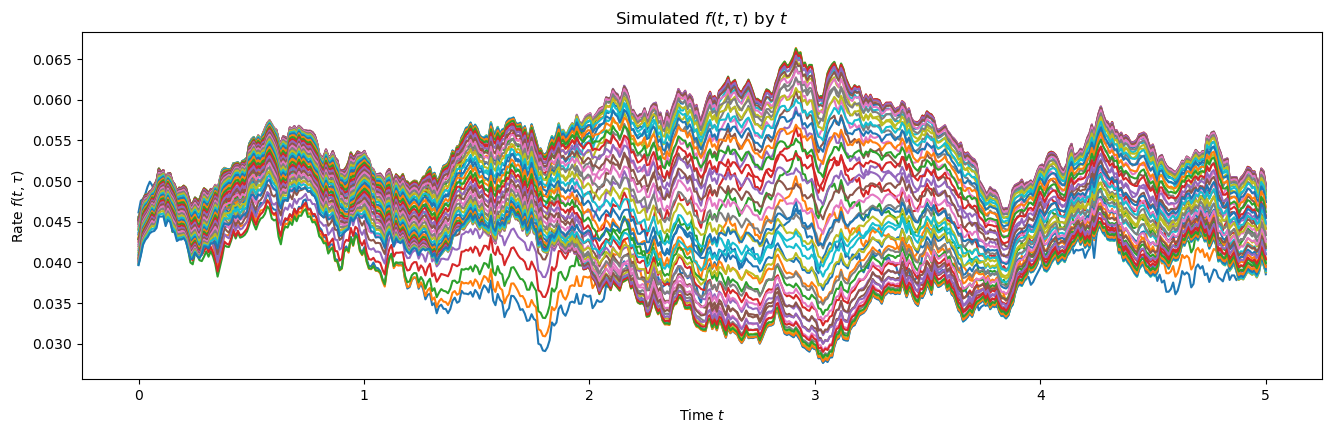

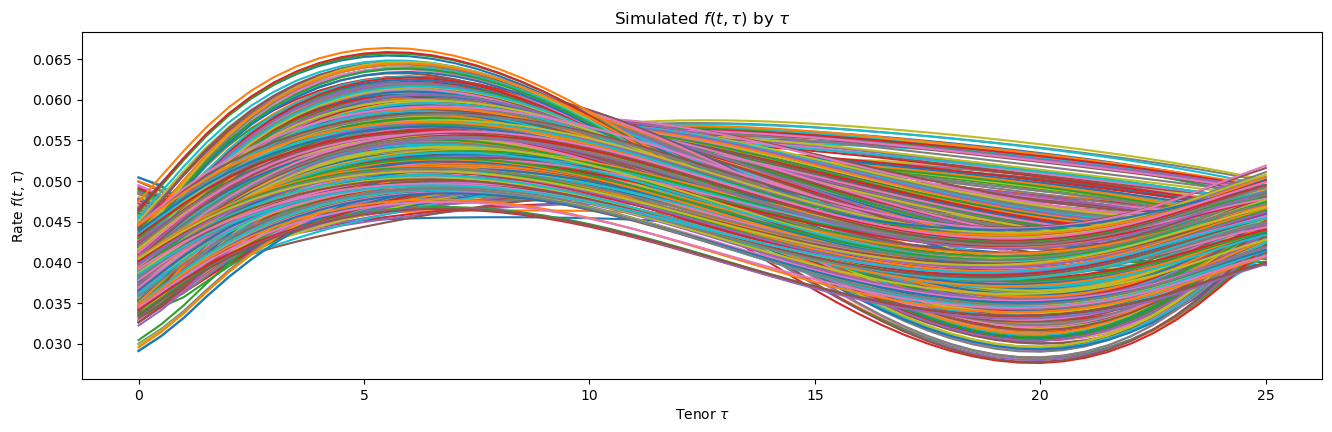

In [23]:
proj_rates = []
proj_timeline = linspace(0,5,500)
# progressbar = ProgressBar("One simulation path", len(proj_timeline))
for i, (t, f) in enumerate(simulation(curve_spot, mc_tenors, mc_drift, mc_vols, proj_timeline)):
    #progressbar.update(i)
    proj_rates.append(f)
proj_rates = matrix(proj_rates)
plot(proj_timeline.transpose(), proj_rates), xlabel(r'Time $t$'), ylabel(r'Rate $f(t,\tau)$');
title(r'Simulated $f(t,\tau)$ by $t$'), show();
plot(mc_tenors, proj_rates.transpose()), xlabel(r'Tenor $\tau$'), ylabel(r'Rate $f(t,\tau)$');
title(r'Simulated $f(t,\tau)$ by $\tau$'), show();

In [24]:
class Integrator:
    def __init__(self, x0, x1):
        assert x0 < x1
        self.sum, self.n, self.x0, self.x1= 0, 0, x0, x1
    def add(self, value):
        self.sum += value
        self.n += 1
    def get_integral(self):
        return (self.x1 - self.x0) * self.sum / self.n

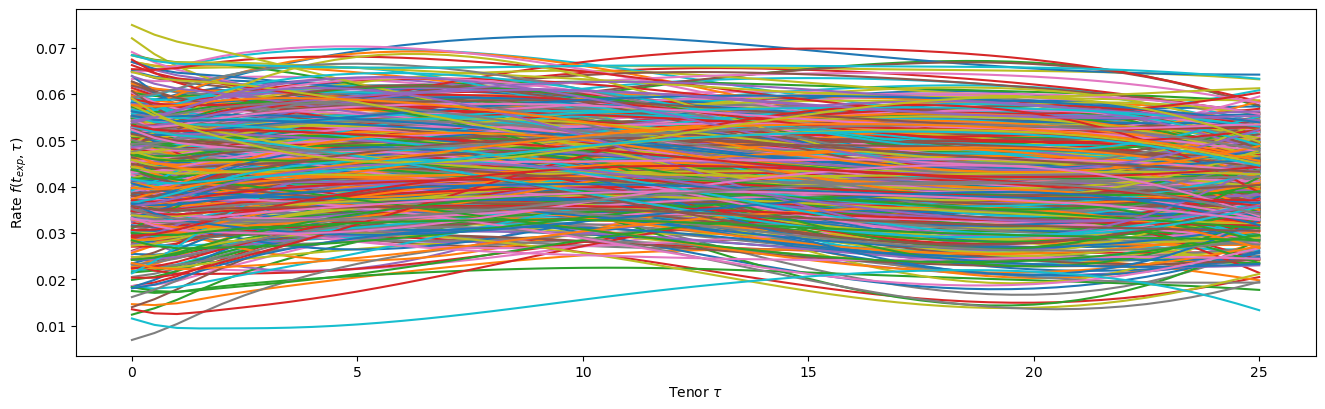

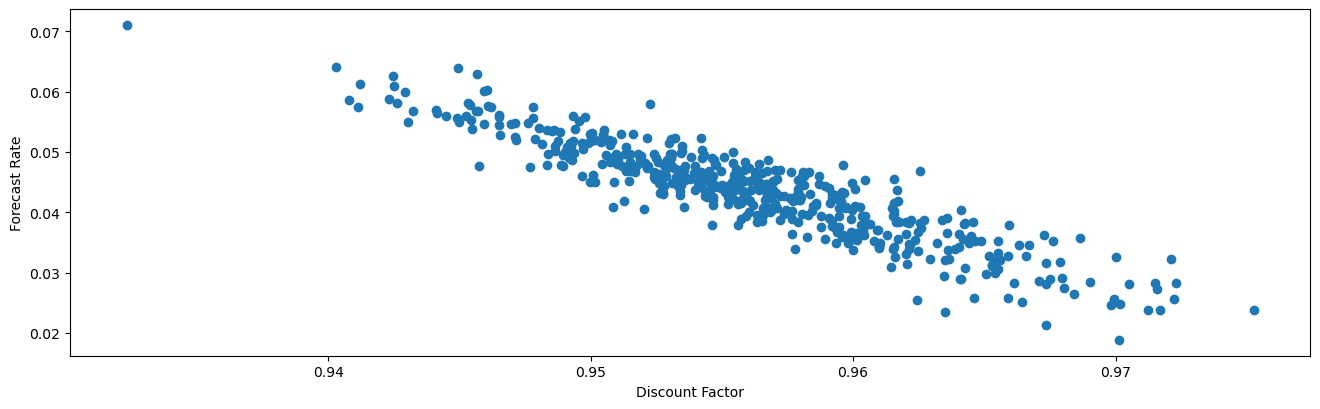

Final value: 13078.429432


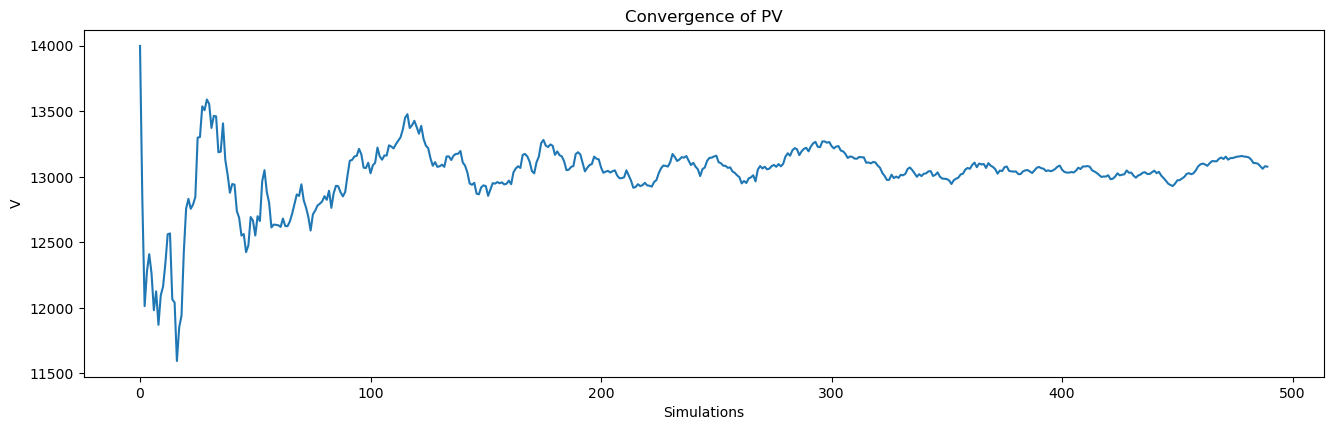

In [27]:
t_exp, t_mat = 1., 2.
K, notional = .03, 1e6
n_simulations, n_timesteps = 500, 50

proj_timeline = linspace(0,t_mat, n_timesteps)
# progressbar = ProgressBar('Performing simulation', n_simulations)
simulated_forecast_rates = []
simulated_df = []
simulated_pvs = []
pv_convergence_process = []
for i in range(0, n_simulations):
    # progressbar.update(i)
    rate_forecast = None                    # Forecast rate between t_exp and t_mat for this path
    rate_discount = Integrator(0, t_exp)      # cont.compounded discount rate for this path
    for t, curve_fwd in simulation(curve_spot, mc_tenors, mc_drift, mc_vols, proj_timeline):
        f_t_0 = interp(0., mc_tenors, curve_fwd)  # rate $f_t^0$
        rate_discount.add(f_t_0)
        if t>=t_exp and rate_forecast is None:  # t is expiration time
            Tau = t_mat-t_exp
            rate_forecast = Integrator(0, Tau) # integrate all inst.fwd.rates from 0 till 1Y tenor to get 1Y spot rate
            for s in linspace(0, Tau, 15): # $\int_0^T f(t,s)ds$
                f_texp_s = interp(s, mc_tenors, curve_fwd)
                rate_forecast.add(f_texp_s) 
            rate_forecast = rate_forecast.get_integral()
    plot(mc_tenors, curve_fwd), xlabel(r'Tenor $\tau$'), ylabel(r'Rate $f(t_{exp},\tau)$');   # Plot forward curve at expiration
    df = exp(-rate_discount.get_integral())     # Discount factor
    simulated_forecast_rates.append(rate_forecast)
    simulated_df.append(df)
    pv = max(0, rate_forecast - K) * (t_mat-t_exp) * notional * df
    simulated_pvs.append(pv)
    pv_convergence_process.append(average(simulated_pvs))
show()
#
scatter(simulated_df, simulated_forecast_rates), xlabel('Discount Factor'), ylabel('Forecast Rate')
show()
#
plot(pv_convergence_process[10:]), title('Convergence of PV'), xlabel("Simulations"), ylabel("V");
print("Final value: %f" % pv_convergence_process[-1])